In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [2]:
diabetes = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

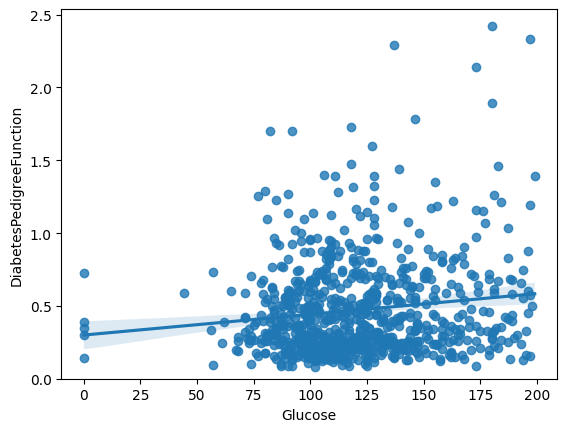

In [15]:
sns.regplot(x='Glucose',y='DiabetesPedigreeFunction', data = diabetes)
plt.ylim(0,)
plt.show()


In [20]:
pearson_cof,p_value = stats.pearsonr(diabetes['Glucose'],diabetes['DiabetesPedigreeFunction'])

In [22]:
print('correlation is: ', pearson_cof)
print('p value is :', p_value)

correlation is:  0.1373372998283707
p value is : 0.00013458781437157466


In [23]:
diabetes[['DiabetesPedigreeFunction', 'Glucose']].head()

,DiabetesPedigreeFunction,Glucose
0,0.627,148
1,0.351,85
2,0.672,183
3,0.167,89
4,2.288,137


In [61]:
w = 0.0031
b = 0

In [62]:
x= np.linspace(0, diabetes['Glucose'].max(), 100)
y =w*x+b

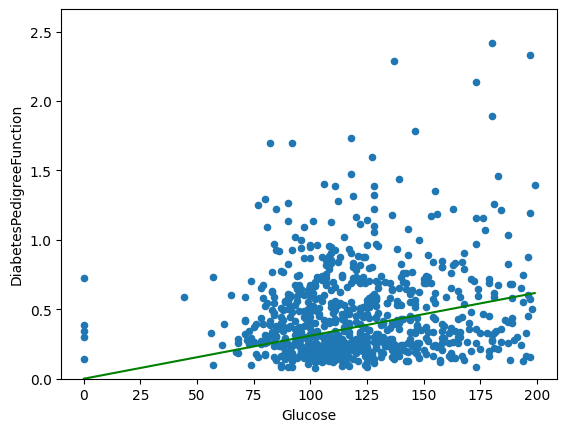

In [64]:
diabetes.plot.scatter(x = 'Glucose',y = 'DiabetesPedigreeFunction')
plt.plot(x,y,'-g')
plt.ylim(0,diabetes['DiabetesPedigreeFunction'].max()*1.1)
plt.show()

In [70]:
diabetes['pred'] = diabetes['Glucose']*w*b

In [71]:
diabetes['diff'] = diabetes['pred']-diabetes['DiabetesPedigreeFunction'] 
diabetes['cuad'] = diabetes['diff']**2
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,diff,cuad
0,6,148,72,35,0,33.6,0.627,50,1,0.0,-0.627,0.393129
1,1,85,66,29,0,26.6,0.351,31,0,0.0,-0.351,0.123201
2,8,183,64,0,0,23.3,0.672,32,1,0.0,-0.672,0.451584
3,1,89,66,23,94,28.1,0.167,21,0,0.0,-0.167,0.027889
4,0,137,40,35,168,43.1,2.288,33,1,0.0,-2.288,5.234944


In [72]:
diabetes['cuad'].mean()

0.33230294140625

In [73]:
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns = ['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [81]:
def sum_error(w, diabetes):
    b=0
    diabetes['pred']= diabetes['Glucose']*w+b
    diabetes['diff']= diabetes['pred']-diabetes['DiabetesPedigreeFunction']
    diabetes['cuad']= diabetes['diff']**2
    return(diabetes['cuad'].mean())

In [82]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, diabetes=diabetes))
grid_error.head()

,w,error
0,50.000000,3.908516e+07
1,53.061224,4.401799e+07
2,56.122449,4.924388e+07
3,59.183673,5.476282e+07
4,62.244898,6.057483e+07


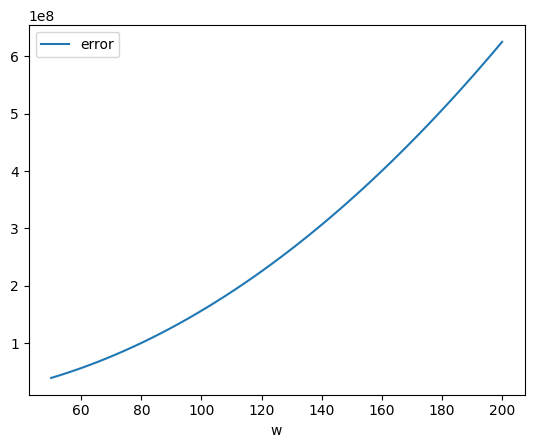

In [83]:
grid_error.plot(x='w', y='error')
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression

In [57]:
x = np.array(diabetes['Glucose']).reshape((-1, 1))
y= np.array(diabetes['DiabetesPedigreeFunction'])

In [59]:
model= LinearRegression(fit_intercept= False)
model.fit(x,y)

LinearRegression(fit_intercept=False)

In [60]:
print(f'intercepto(b): {model.intercept_}')
print(f'pendiente (w): {model.coef_}')

intercepto(b): 0.0
pendiente (w): [0.00374128]
